
<img src="http://imgur.com/1ZcRyrc.png" style="float: right; margin: 10px; height: 70px">

## PROJECT 4 - PART 2 - GA TRAINING 
## EXPLORATORY DATA ANALYSIS

#### Group Members:
   ##### 1. Nor Hamizah Binti Mustaffa
   ##### 2. Normieza Binti Azhar
   ##### 3. Wan Eizham Afeef Bin Wan Ahmad Faizal

####  Domain : Health Insurance
####  Data Deescription : 
The data at hand contains medical costs of people characterized by certain attributes.
####  Attribute Information:

age: Age of primary beneficiary

sex: Insurance contractor gender, female / male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective
index of body weight (kg /  m2 ) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoker / Non - smoker

region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.

#### IMPORTING LIBRARIES/PACKAGES

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### DATA LOADING

In [40]:
# Read data into a DataFrame.

# We use index_col to tell Pandas that the first column in the data has row labels.
data = pd.read_csv('insurance.csv')
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### DATA EXPLORING

In [41]:
#info about the data
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
# Check for missing value in any colum
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
# Check for missing value in any colum
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [44]:
# Print the dataframes
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
# Print the first 10 rows.
data.head(10)  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [47]:
# Print the last five rows.
data.tail()            

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [48]:
# The row index (aka "the row labels" — in this case integers)
data.index 

RangeIndex(start=0, stop=1338, step=1)

In [49]:
# Column names (which is "an index")
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
# Number of rows and columns
data.shape

(1338, 7)

In [51]:
# Describe all columns, including non-numeric.
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [52]:
# five point summary of the continuous attributes
data.describe()   

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

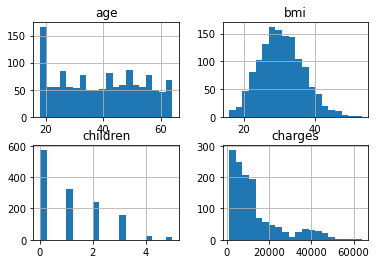

In [53]:
#visualize continouis variable/numerical variables.
data.hist(bins=20)

In [100]:
#check the skewness of the continious variables that do not have normal distribution
# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.age),stats.skew(data.bmi),stats.skew(data.charges)]},
                        index=['age','bmi','charges']) 
Skewness

,Skewness
age,0.055610
bmi,0.283729
charges,1.514180


#### SUMMARY: 
1. All 3 variables have positive skewness since the skewnes value is more than 0. 
2. The most positively skewed variable is charges followed by bmi and age.


In [102]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 18
Q1                    : 27.0
Q2(Median)            : 39.0
Q3                    : 51.0
Age(max) : 64


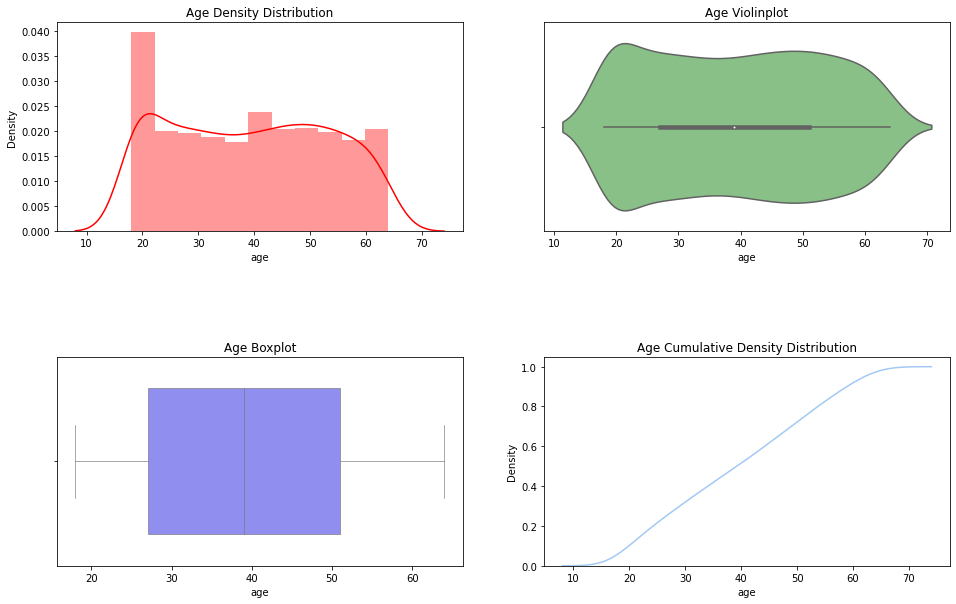

In [103]:
summary('age')

5 Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1                    : 26.29625
Q2(Median)            : 30.4
Q3                    : 34.69375
Bmi(max) : 53.13


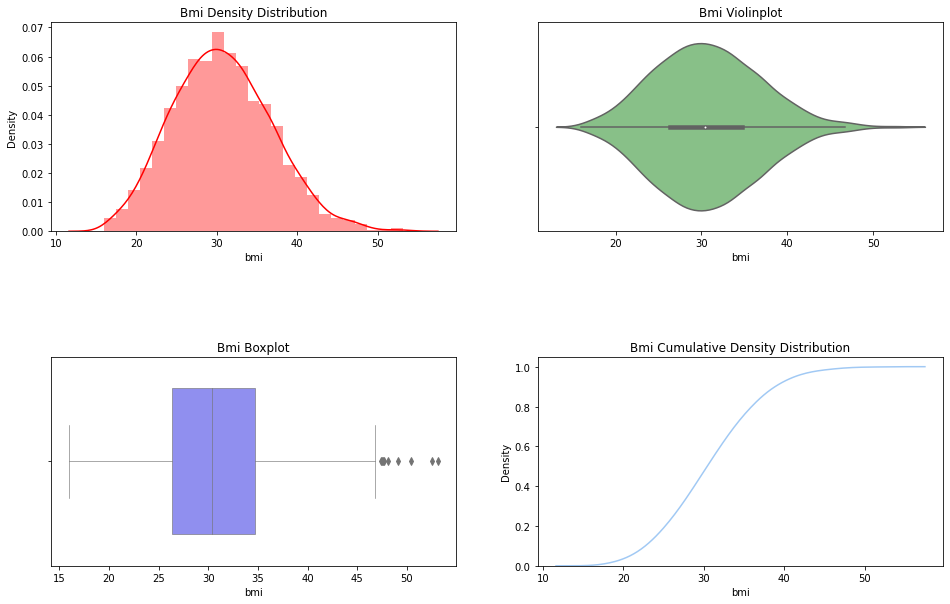

In [108]:
summary('bmi')

5 Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1                    : 4740.28715
Q2(Median)            : 9382.033
Q3                    : 16639.912515
Charges(max) : 63770.42801


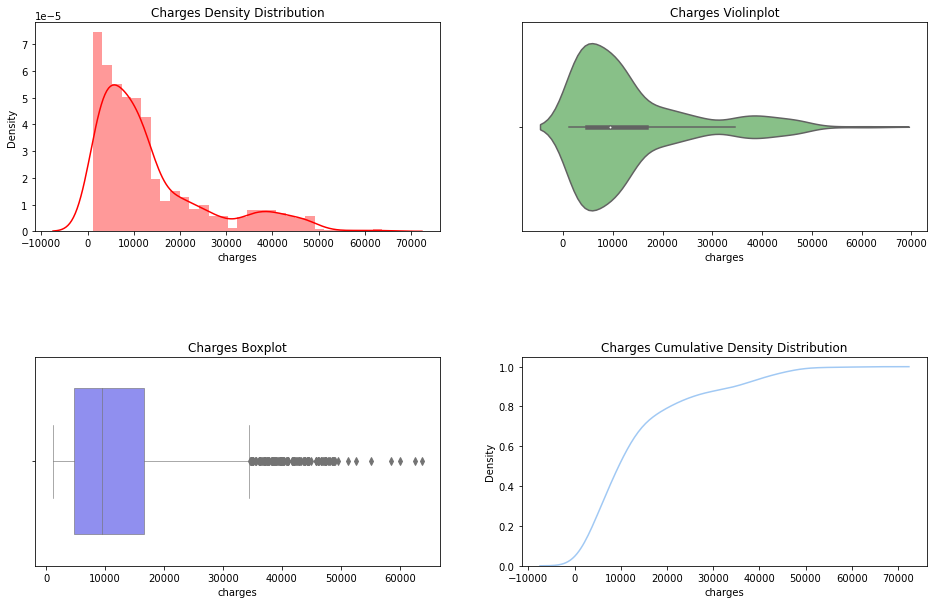

In [109]:
summary('charges')

5 Point Summary of Children Attribute:
Children(min) : 0
Q1                    : 0.0
Q2(Median)            : 1.0
Q3                    : 2.0
Children(max) : 5


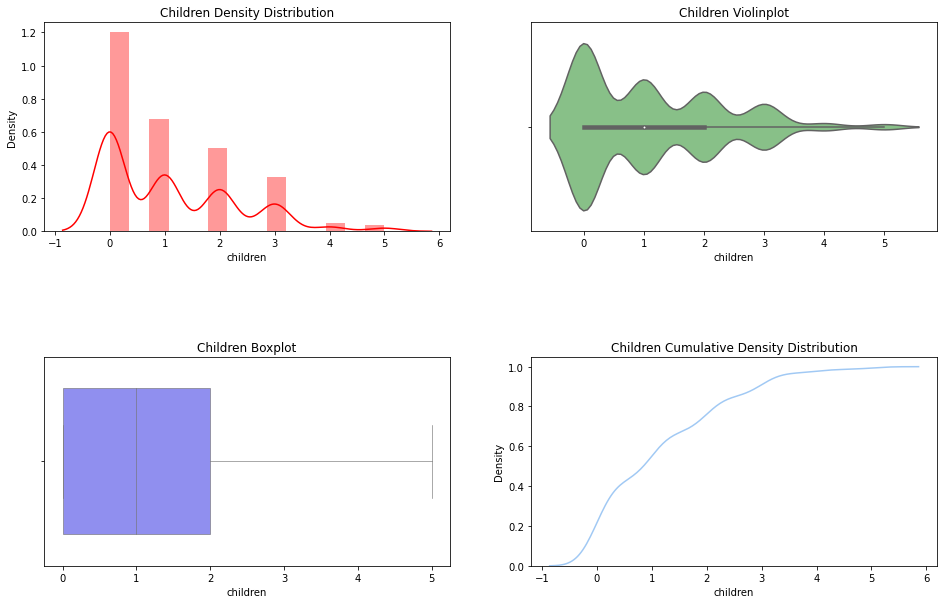

In [110]:
summary('children')

In [70]:
cat_cols = data.select_dtypes(include = 'object')
num_cols =data.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns are :  Index(['sex', 'smoker', 'region'], dtype='object')


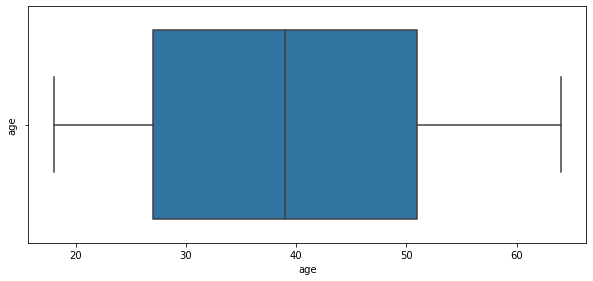

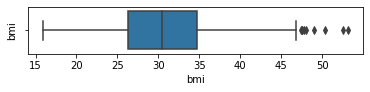

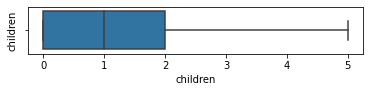

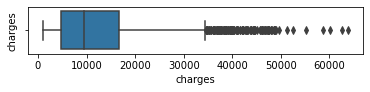

In [72]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_cols,1):
        plt.subplot(4,1,i)
        sns.boxplot(data[col])
        plt.ylabel(col)
        plt.show()

In [73]:
mean=data['bmi'].mean()
std=data['bmi'].std()
threshold = 3
outlier = [] 
for i in data['bmi']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [49.06, 50.38, 52.58, 53.13]


<AxesSubplot:xlabel='sex', ylabel='count'>

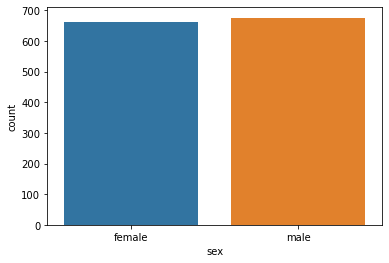

In [77]:

sns.countplot(x=data['sex'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

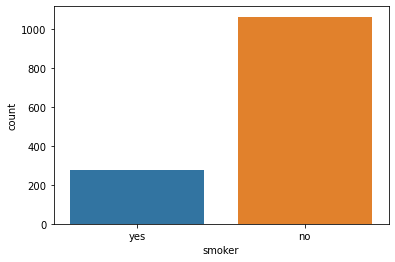

In [78]:

sns.countplot(x=data['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

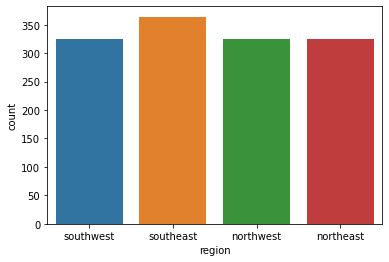

In [79]:
sns.countplot(x=data['region'])

<AxesSubplot:xlabel='children', ylabel='count'>

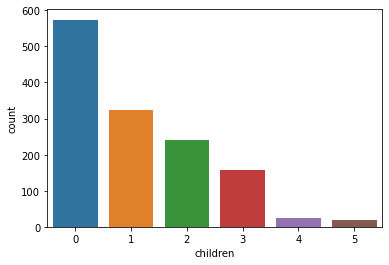

In [80]:
sns.countplot(x=data['children'])

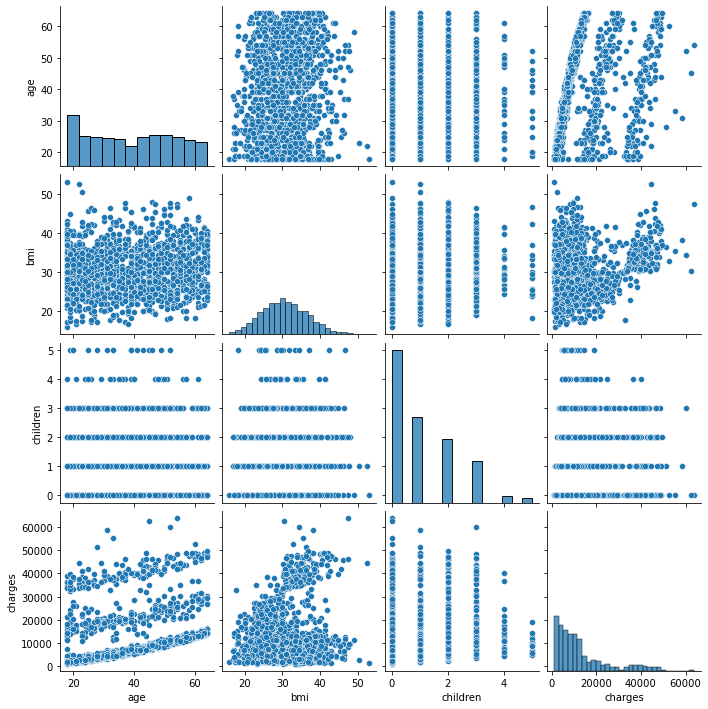

In [74]:
sns.pairplot(data)  #pairplot
plt.show()

In [75]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

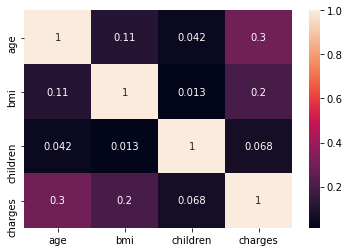

In [76]:
sns.heatmap(corr, annot=True)

Do charges of people who smoke differ significantly from the people who don't?¶


In [81]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

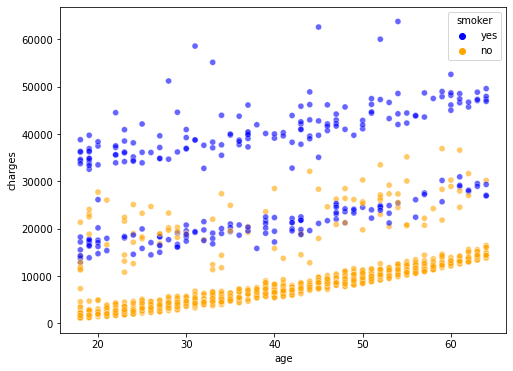

In [114]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['blue','orange'] ,alpha=0.6)
plt.show()

Does bmi of males differ significantly from that of females?

In [84]:
data.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

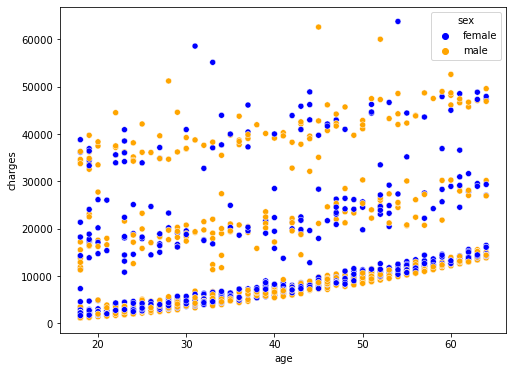

In [115]:
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['blue','orange'] )
plt.show()